In [1]:
%cd ../..

c:\Users\aldion\Desktop\Development\virtusize-algo


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from src.utils.preprocessor import preprocess_data
import seaborn as sns

from src.utils.eda import display_train_test_feature_comparison_histograms, get_train_test_feature_comparison_table

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")


In [4]:
df_train.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
0,M,18.0,"1,674",52.9,790,655,851
1,M,18.0,"1,678",55.8,825,654,880
2,M,23.0,"1,790",57.5,800,650,870
3,F,37.0,"1,626",66.3,962,820,997
4,M,24.0,"1,722",69.2,948,785,937


In [5]:
df_test.head()

,gender,age,height,weight
0,M,27,"1,729",74.7
1,M,25,"1,645",58.6
2,M,28,"1,786",75.2
3,M,19,"1,686",60.8
4,M,24,"1,764",68.3


In [6]:
df_train.shape, df_test.shape

((5137, 7), (1284, 4))

In [7]:
df_train.dtypes


gender                  object
age                    float64
height                  object
weight                 float64
bust_circumference      object
waist_circumference     object
hip_circumference       object
dtype: object

In [8]:
df_test.dtypes

gender     object
age         int64
height     object
weight    float64
dtype: object

- The data types for the various features are similar, so similar preprocessing steps may be applied. See `src/utils/preprocessor.py` for the implementation of the preprocessing steps.

### Analsis of null values

In [9]:
df_train[df_train.isnull().sum(axis=1) != 0]

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
1801,F,19.0,"1,620",NaN,775,622,850
2360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,M,17.0,"1,762",NaN,836,690,900
3303,M,31.0,"1,725",NaN,NaN,NaN,NaN
3752,M,20.0,"1,821",NaN,931,762,942
4189,M,22.0,"1,730",NaN,NaN,NaN,NaN
4603,F,63.0,"1,573",NaN,"1,002",910,928
4876,M,37.0,NaN,83.9,NaN,NaN,NaN


In [10]:
df_test[df_test.isnull().sum(axis=1) != 0]

,gender,age,height,weight
415,M,17,"1,740",NaN


- Since only a very small percentage of the training set has missing values ( 8 of 5137) and those missing values often contain multiple missing values, missing values will be be dropped. The test dataset has only one example with missing data. This methodology used to handle this will be described in the project's `README.md` file.

### EDA

In [11]:
df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

In [12]:
df_train.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
0,1,18.0,1674.0,52.9,790.0,655.0,851.0
1,1,18.0,1678.0,55.8,825.0,654.0,880.0
2,1,23.0,1790.0,57.5,800.0,650.0,870.0
3,0,37.0,1626.0,66.3,962.0,820.0,997.0
4,1,24.0,1722.0,69.2,948.0,785.0,937.0


In [13]:
df_test.head()

,gender,age,height,weight
0,1,27,1729.0,74.7
1,1,25,1645.0,58.6
2,1,28,1786.0,75.2
3,1,19,1686.0,60.8
4,1,24,1764.0,68.3


In [14]:
df_train[df_train.isnull().sum(axis=1) != 0]

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference


- Missing values have been as part of the preprocessing

In [15]:
df_train["bmi_proxy"] = df_train["height"] / df_train["weight"]
df_train.head()

# A bmi_prox feature is added to the train data here. It is hypothesized that this will contain useful predictive information

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference,bmi_proxy
0,1,18.0,1674.0,52.9,790.0,655.0,851.0,31.644612
1,1,18.0,1678.0,55.8,825.0,654.0,880.0,30.071685
2,1,23.0,1790.0,57.5,800.0,650.0,870.0,31.130435
3,0,37.0,1626.0,66.3,962.0,820.0,997.0,24.524887
4,1,24.0,1722.0,69.2,948.0,785.0,937.0,24.884393


Text(0.5, 1.0, 'Correlation Heatmap')

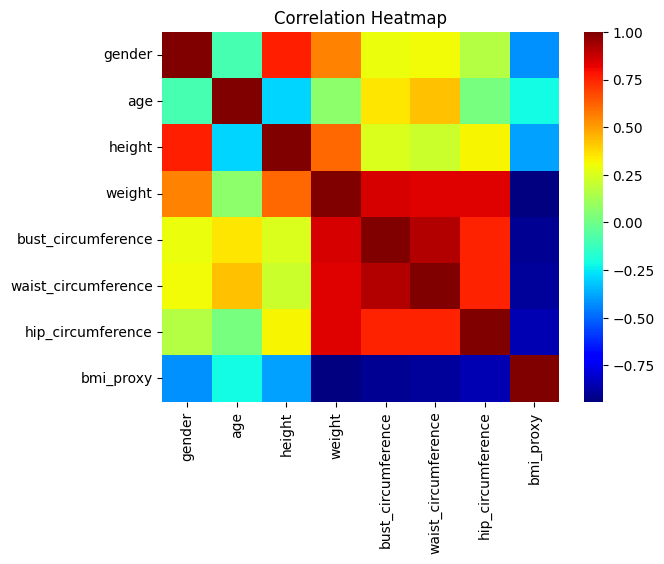

In [16]:
sns.heatmap(df_train.corr(), cmap="jet")
plt.title("Correlation Heatmap")

- From the plot above we can see that age, gender and height are not particularly correlated with the target variables. We see strong positive correlation between weight and the target variables and strong negative correlation between the synthetic feature, `bmi_proxy`, and the target variables. The target variables themselves are highly correlated.

- It must be noted that this does not mean that age, height and gender will not be important features. The interactions of those features with other features could prove useful for the various models which will be trained.

### Train and Test Dataset Comparisons

In [17]:
get_train_test_feature_comparison_table(df_train, df_test, "age")

,mean,st_dev,max,min,count
train_data,31.588224,14.429656,69.0,15.0,5129
test_data,30.500390,14.173781,69.0,15.0,1283


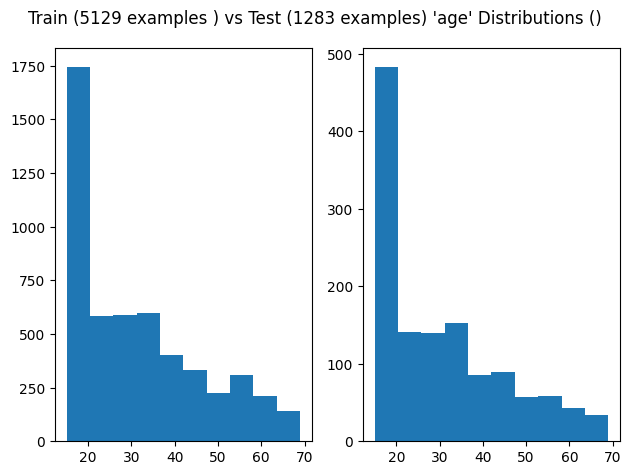

In [18]:
display_train_test_feature_comparison_histograms(df_train, df_test, "age")

- The table and plot indicate that the distribution of ages in both datasets is approximately equal.

In [19]:
get_train_test_feature_comparison_table(df_train, df_test, "gender")

,mean,st_dev,max,min,count
train_data,0.498343,0.500046,1,0,5129
test_data,0.494154,0.500161,1,0,1283


- We can see from the table above that the distributions of gender in both datasets is slightly similar. Both datasets also have slightly more females than males.

In [20]:
get_train_test_feature_comparison_table(df_train, df_test, "height")

,mean,st_dev,max,min,count
train_data,1654.152661,89.787196,1915.0,1354.0,5129
test_data,1655.411535,87.822695,1905.0,1394.0,1283


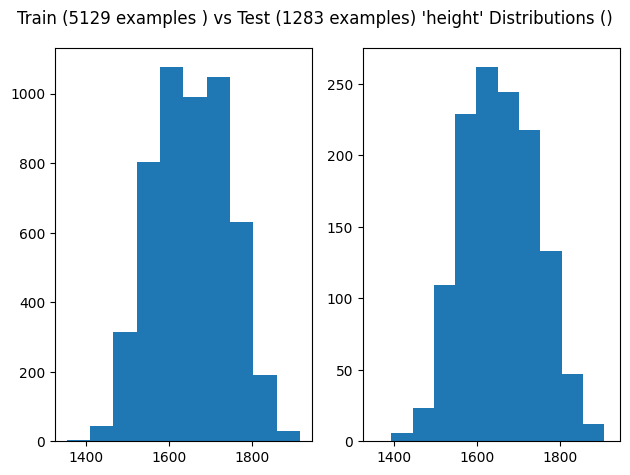

In [21]:
display_train_test_feature_comparison_histograms(df_train, df_test, "height")

- The distribution of heights is also similar across the two datasets

In [22]:
get_train_test_feature_comparison_table(df_train, df_test, "weight")

,mean,st_dev,max,min,count
train_data,63.872431,12.648540,139.2,36.8,5129
test_data,63.733671,12.210294,114.6,37.2,1283


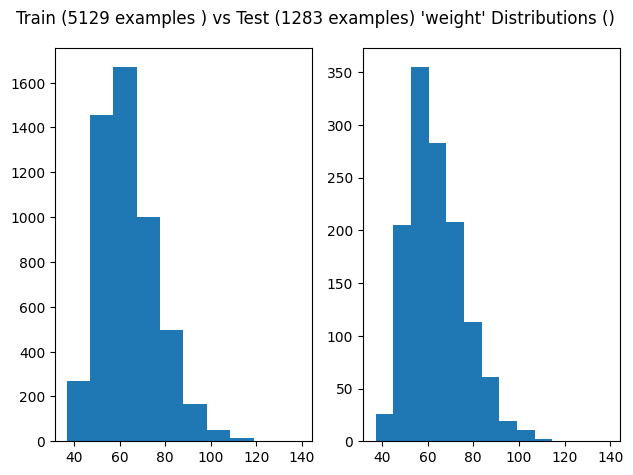

In [23]:
display_train_test_feature_comparison_histograms(df_train, df_test, "weight")

- The distribution of weights is similar across the datasets. We do observe slightly more variability in the training data. This is not significant enough to cause concerns over dataset skew, however. Overall while the accuracy of the models that will be built cannot be guaranteed at the moment, preliminary EDA indicates that the models are liekly to generalize to the test data. 